In [1]:
suppressMessages(source("../config_sing.R"))

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
SIZES = c("100", "200", "500", "1000")
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

lst_dat = lapply(SIZES, function(size){
    fname = paste0(
        "KS91_K562_hg38_ASTARRseq_Depth.GATA1.unstranded.",
        "bin", size, 
        ".tsv")
    fpath = file.path(fdiry, fname)
    dat = read_tsv(fpath, show_col_types = FALSE)

    ### summarize the repeats for output and inptu
    dat = dat %>% 
        group_by(Chrom, Start, End, Group) %>% 
        summarise(Depth_Norm = mean(Depth_Norm, na.rm = TRUE), .groups = "drop")

    ### calculate the ratio
    dat = dat %>% 
        spread(Group, Depth_Norm) %>%
        mutate(Diff = Output - Input)
    return(dat)
})

names(lst_dat) = SIZES

In [89]:
lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]] %>% dplyr::select(Chrom, Start, End, Input) %>% na.omit
    txt = paste0("ATAC-STARR Coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start, 
                xmax=End, 
                ymin=0, 
                ymax=Input)) +
        labs(y="Input", title=txt) +
        theme_cowplot()
    return(gpt)
})

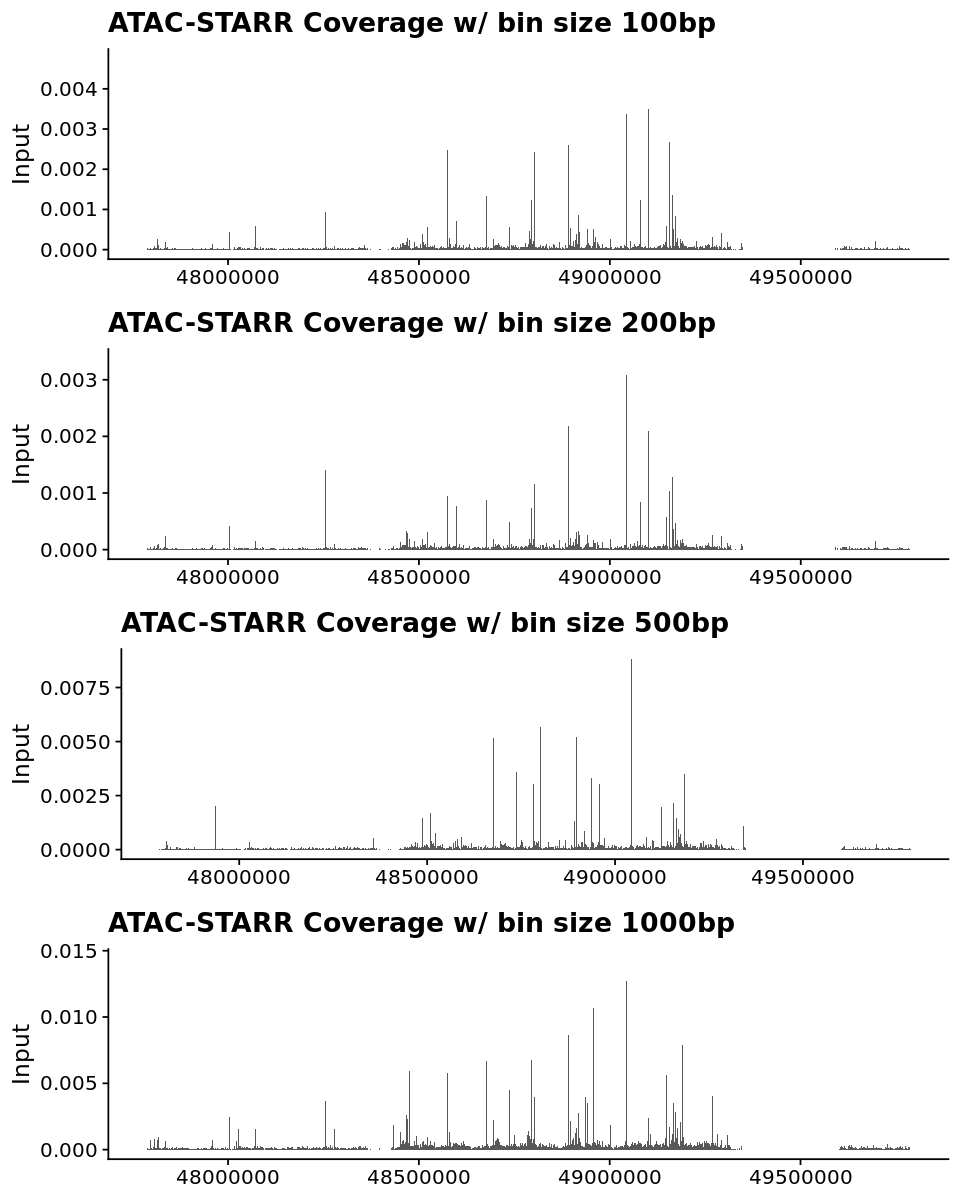

In [90]:
options(repr.plot.height=10, repr.plot.width=8)
plot_grid(plotlist = lst_gpt, ncol=1)

In [91]:
lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]] %>% dplyr::select(Chrom, Start, End, Output) %>% na.omit
    txt = paste0("ATAC-STARR Coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start, 
                xmax=End, 
                ymin=0, 
                ymax=Output)) +
        labs(y="Output", title=txt) +
        theme_cowplot()
    return(gpt)
})

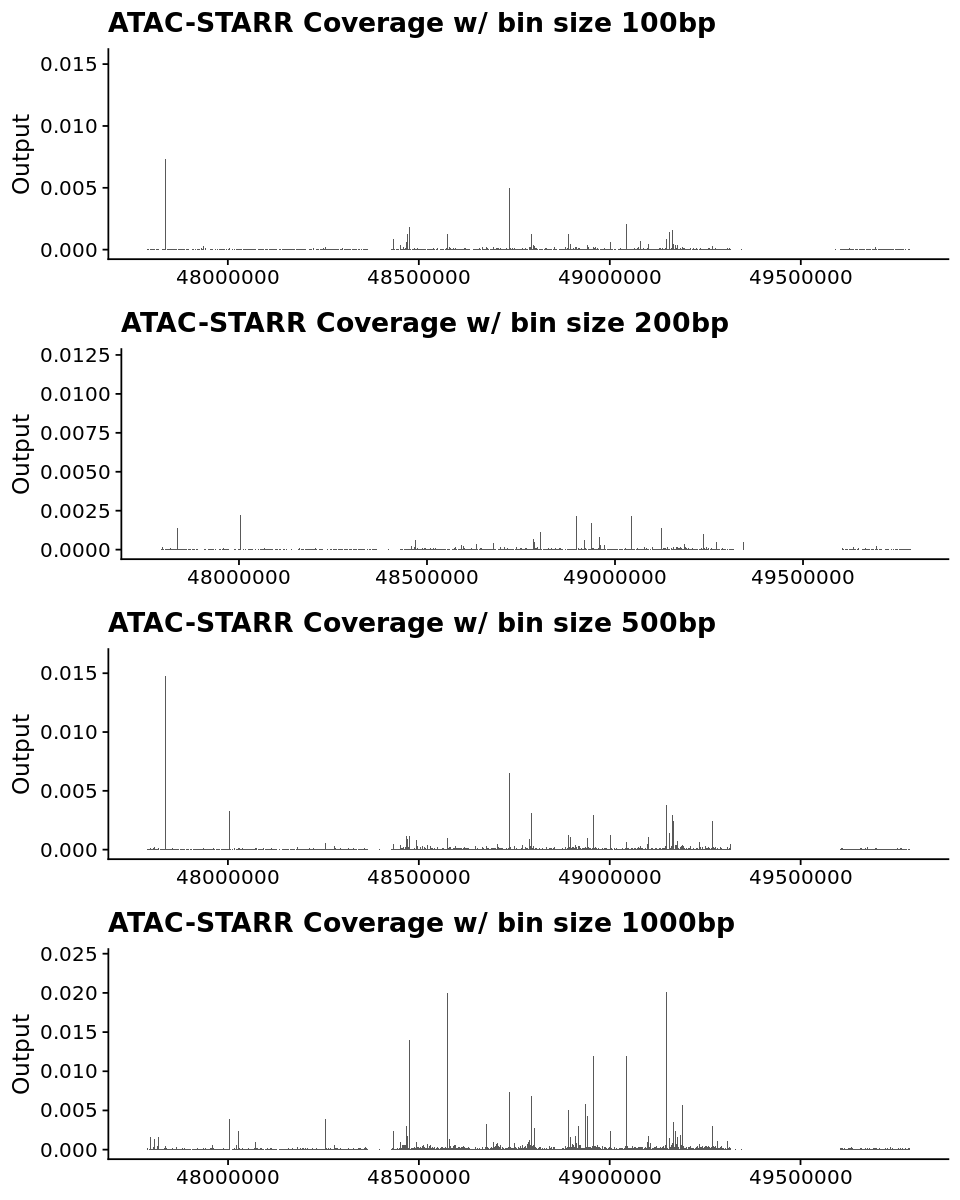

In [92]:
options(repr.plot.height=10, repr.plot.width=8)
plot_grid(plotlist = lst_gpt, ncol=1)

In [108]:
lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]] %>% dplyr::select(Chrom, Start, End, Ratio) %>% na.omit
    txt = paste0("ATAC-STARR Coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start, 
                xmax=End, 
                ymin=0, 
                ymax=Ratio)) +
        labs(y="Ratio", title=txt) +
        theme_cowplot()
    return(gpt)
})

In [106]:
dat = lst_dat[[1]] %>% dplyr::select(Chrom, Start, End, Ratio) %>% na.omit
head(dat)

Chrom,Start,End,Ratio
<chr>,<dbl>,<dbl>,<dbl>
chrX,47787201,47787301,3.224636
chrX,47787301,47787401,2.018481
chrX,47787501,47787601,3.832671
chrX,47787601,47787701,4.317626
chrX,47787801,47787901,3.367598
chrX,47787901,47788001,1.493021


In [107]:
dat %>% dplyr::filter(Ratio > 10)

Chrom,Start,End,Ratio
<chr>,<dbl>,<dbl>,<dbl>
chrX,47901601,47901701,14.35410
chrX,47907301,47907401,14.94146
chrX,47907601,47907701,11.04790
chrX,48080901,48081001,11.06716
chrX,48149401,48149501,11.20025
chrX,48179201,48179301,11.13925
chrX,48243401,48243501,12.63894
chrX,48245201,48245301,10.37005
chrX,48308401,48308501,10.09185


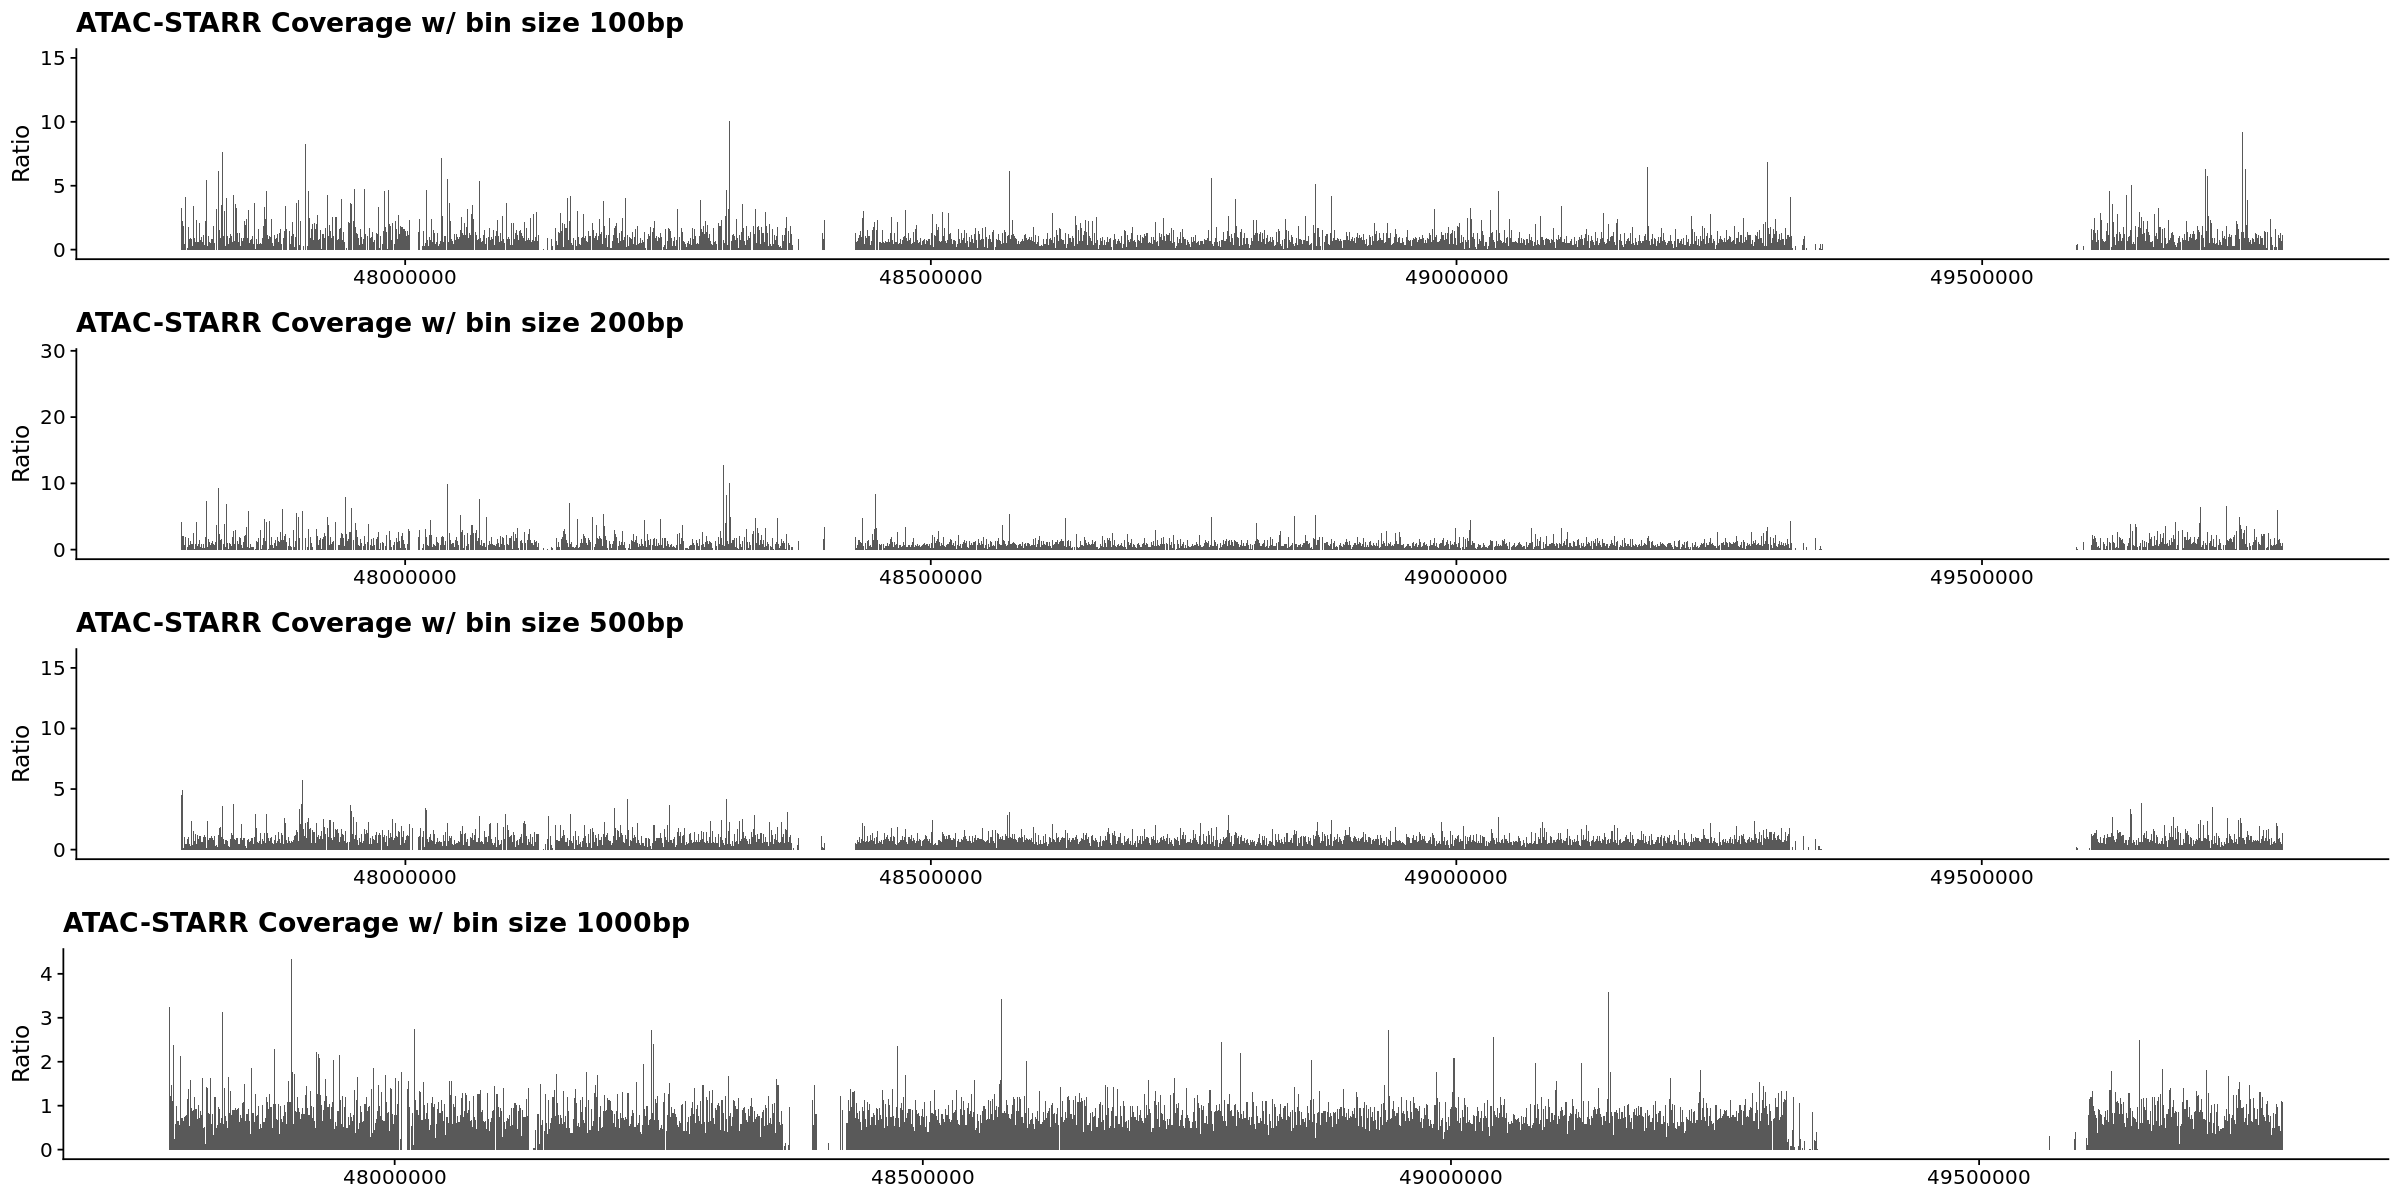

In [111]:
options(repr.plot.height=10, repr.plot.width=20)
plot_grid(plotlist = lst_gpt, ncol=1)

In [93]:
start  = 48780000
end    = 48826000

lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]] %>% dplyr::select(Chrom, Start, End, Input) %>% na.omit
    txt = paste0("ATAC-STARR Coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start, 
                xmax=End, 
                ymin=0, 
                ymax=Input)) +
        labs(y="Input", title=txt) +
        xlim(start, end) +
        theme_cowplot()
    return(gpt)
})

Warning message:
“Removed 16488 rows containing missing values (geom_rect).”
Warning message:
“Removed 8222 rows containing missing values (geom_rect).”
Warning message:
“Removed 3288 rows containing missing values (geom_rect).”
Warning message:
“Removed 1673 rows containing missing values (geom_rect).”


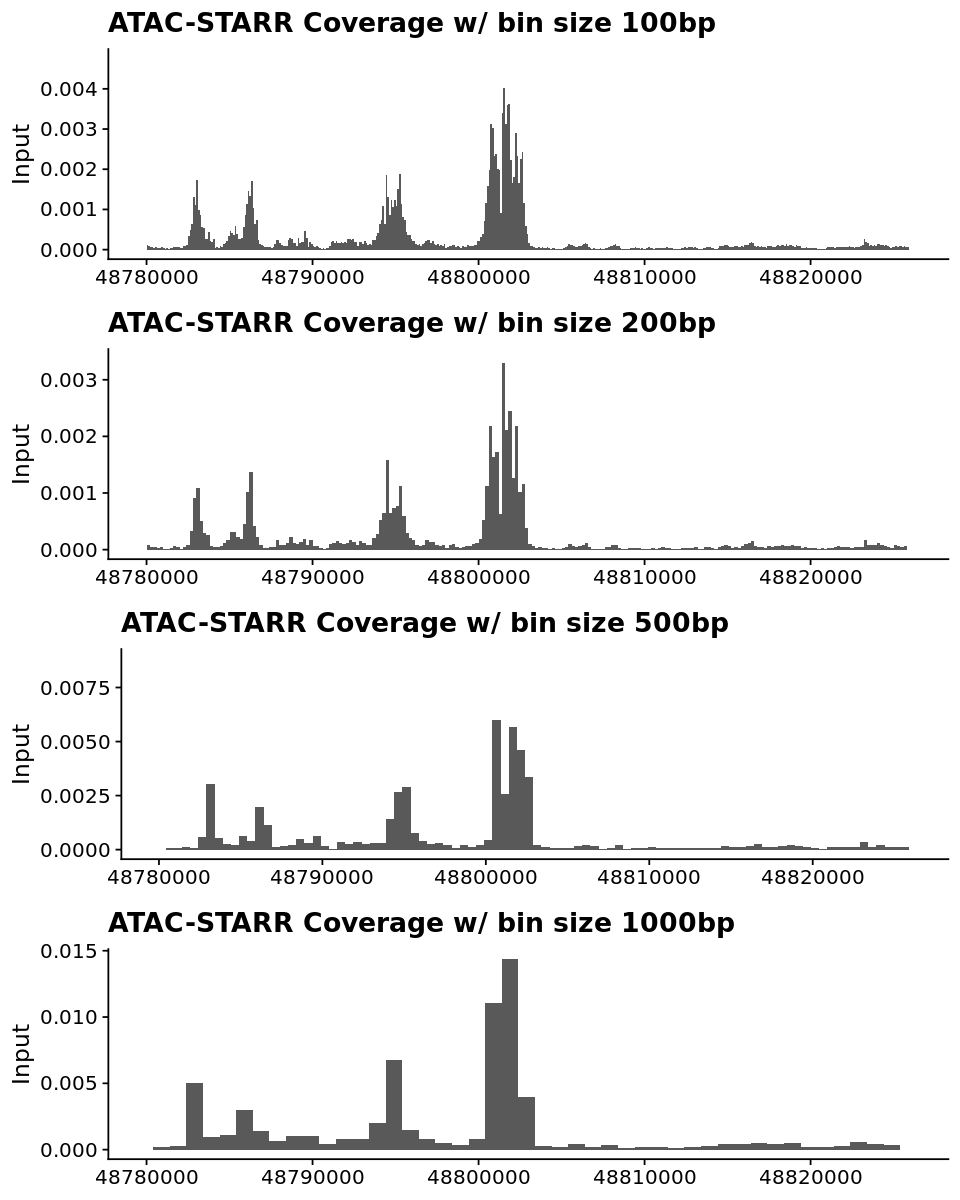

In [94]:
options(repr.plot.height=10, repr.plot.width=8)
plot_grid(plotlist = lst_gpt, ncol=1)

In [49]:
start  = 48780000
end    = 48826000

lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]] %>% dplyr::select(Chrom, Start, End, Output) %>% na.omit
    txt = paste0("ATAC-STARR Coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start, 
                xmax=End, 
                ymin=0, 
                ymax=Output)) +
        labs(y="Output", title=txt) +
        xlim(start, end) +
        theme_cowplot()
    return(gpt)
})

Warning message:
“Removed 15537 rows containing missing values (geom_rect).”
Warning message:
“Removed 7535 rows containing missing values (geom_rect).”
Warning message:
“Removed 3202 rows containing missing values (geom_rect).”
Warning message:
“Removed 1632 rows containing missing values (geom_rect).”


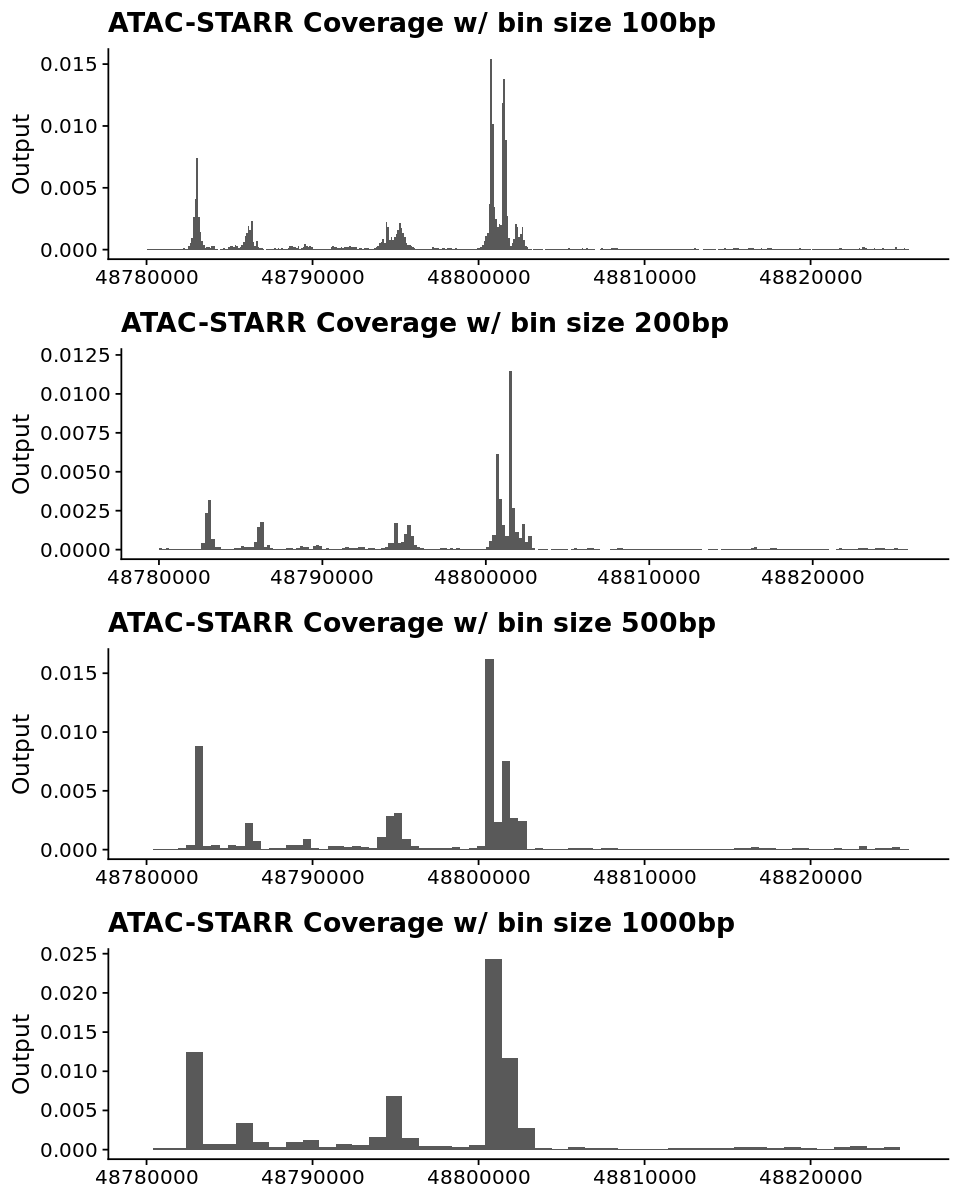

In [50]:
options(repr.plot.height=10, repr.plot.width=8)
plot_grid(plotlist = lst_gpt, ncol=1)

In [115]:
start  = 48780000
end    = 48826000

lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]] %>% dplyr::select(Chrom, Start, End, Diff) %>% na.omit
    txt = paste0("ATAC-STARR Coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start, 
                xmax=End, 
                ymin=0, 
                ymax=Diff)) +
        labs(y="Diff", title=txt) +
        xlim(start, end) +
        theme_cowplot()
    return(gpt)
})

Warning message:
“Removed 15527 rows containing missing values (geom_rect).”
Warning message:
“Removed 7531 rows containing missing values (geom_rect).”
Warning message:
“Removed 3201 rows containing missing values (geom_rect).”
Warning message:
“Removed 1631 rows containing missing values (geom_rect).”


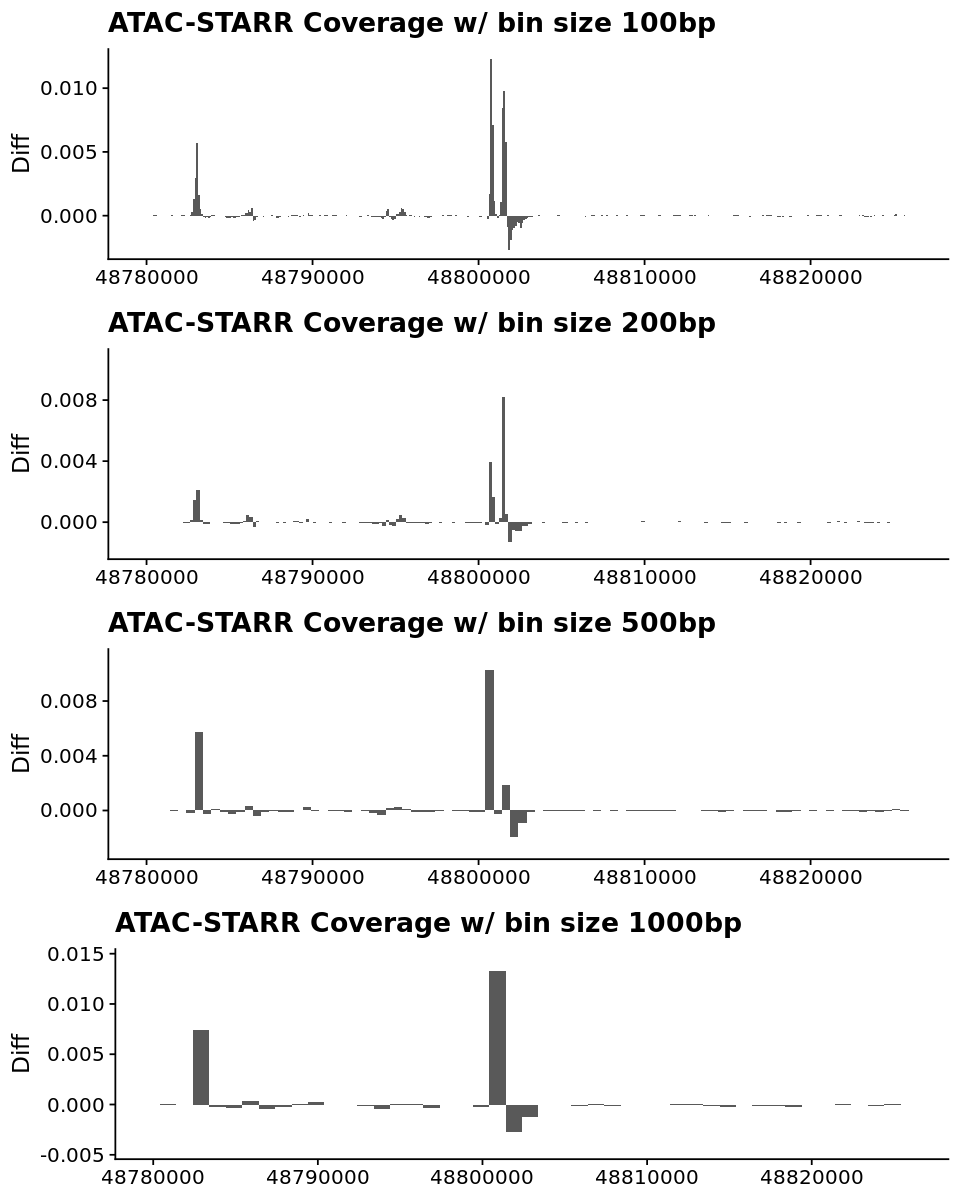

In [116]:
options(repr.plot.height=10, repr.plot.width=8)
plot_grid(plotlist = lst_gpt, ncol=1)

In [47]:
start  = 48780000
end    = 48826000

lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]] %>% dplyr::select(Chrom, Start, End, Ratio) %>% na.omit
    txt = paste0("ATAC-STARR Coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start, 
                xmax=End, 
                ymin=0, 
                ymax=Ratio)) +
        labs(y="Ratio", title=txt) +
        xlim(start, end) +
        ylim(0, 6) +
        theme_cowplot()
    return(gpt)
})

Warning message:
“Removed 15527 rows containing missing values (geom_rect).”
Warning message:
“Removed 7531 rows containing missing values (geom_rect).”
Warning message:
“Removed 3201 rows containing missing values (geom_rect).”
Warning message:
“Removed 1631 rows containing missing values (geom_rect).”


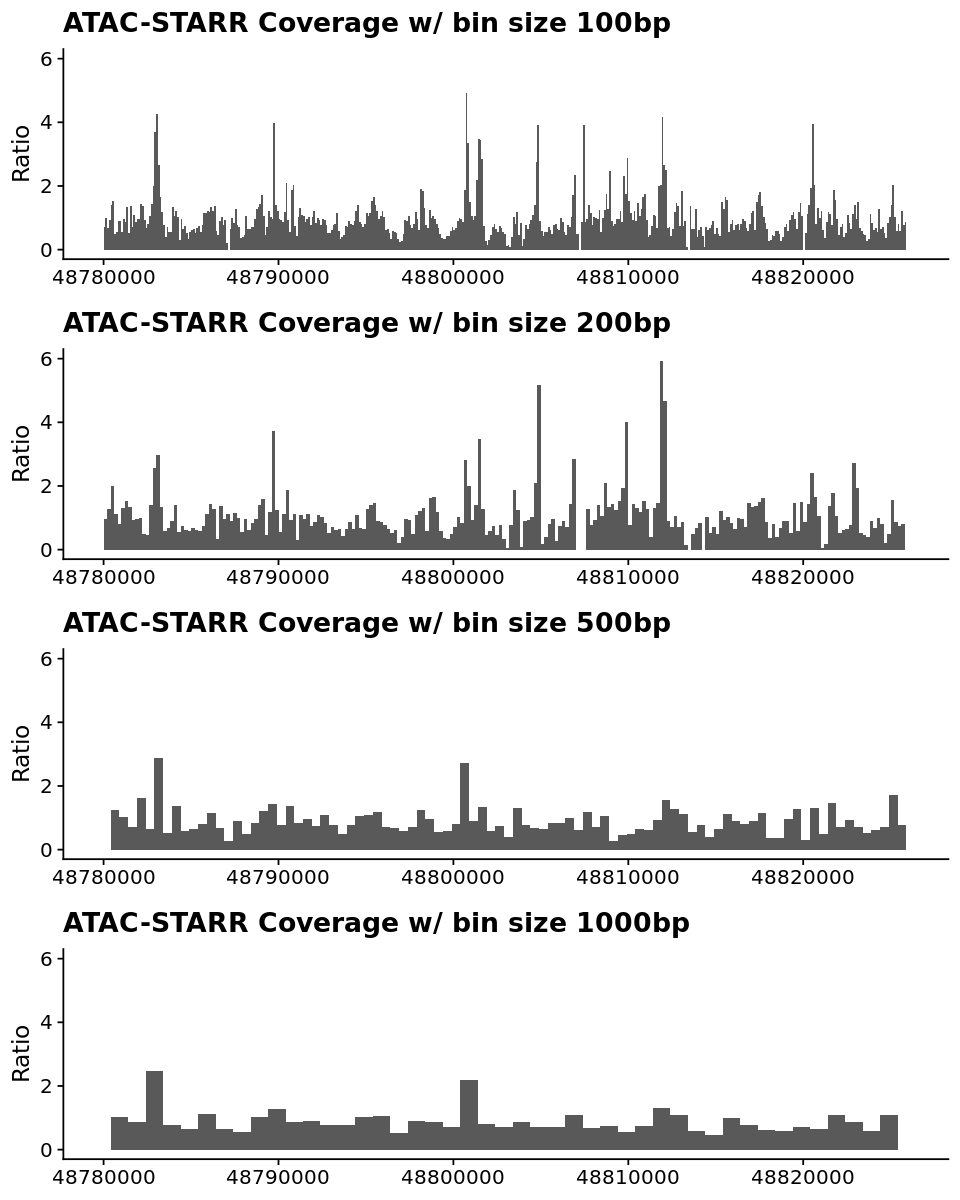

In [48]:
options(repr.plot.height=10, repr.plot.width=8)
plot_grid(plotlist = lst_gpt, ncol=1)

Warning message:
“Removed 15527 rows containing missing values (geom_rect).”


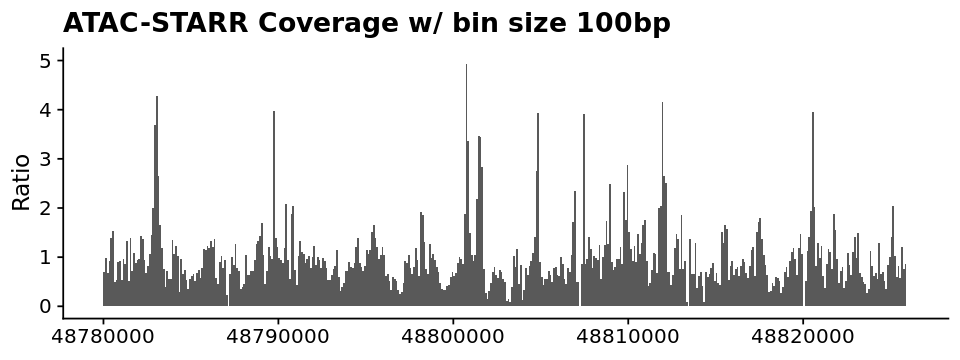

In [44]:
options(repr.plot.height=3, repr.plot.width=8)
print(lst_gpt[[1]] + ylim(0, 5))

In [37]:
start  = 48780000
end    = 48826000

lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]] %>% dplyr::select(Chrom, Start, End, Ratio) %>% na.omit
    txt = paste0("ATAC-STARR Coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start, 
                xmax=End, 
                ymin=0, 
                ymax=log2(Ratio))) +
        labs(y="Log2(Ratio)", title=txt) +
        xlim(start, end) +
        theme_cowplot()
    return(gpt)
})

Warning message:
“Removed 15527 rows containing missing values (geom_rect).”
Warning message:
“Removed 7531 rows containing missing values (geom_rect).”
Warning message:
“Removed 3201 rows containing missing values (geom_rect).”
Warning message:
“Removed 1631 rows containing missing values (geom_rect).”


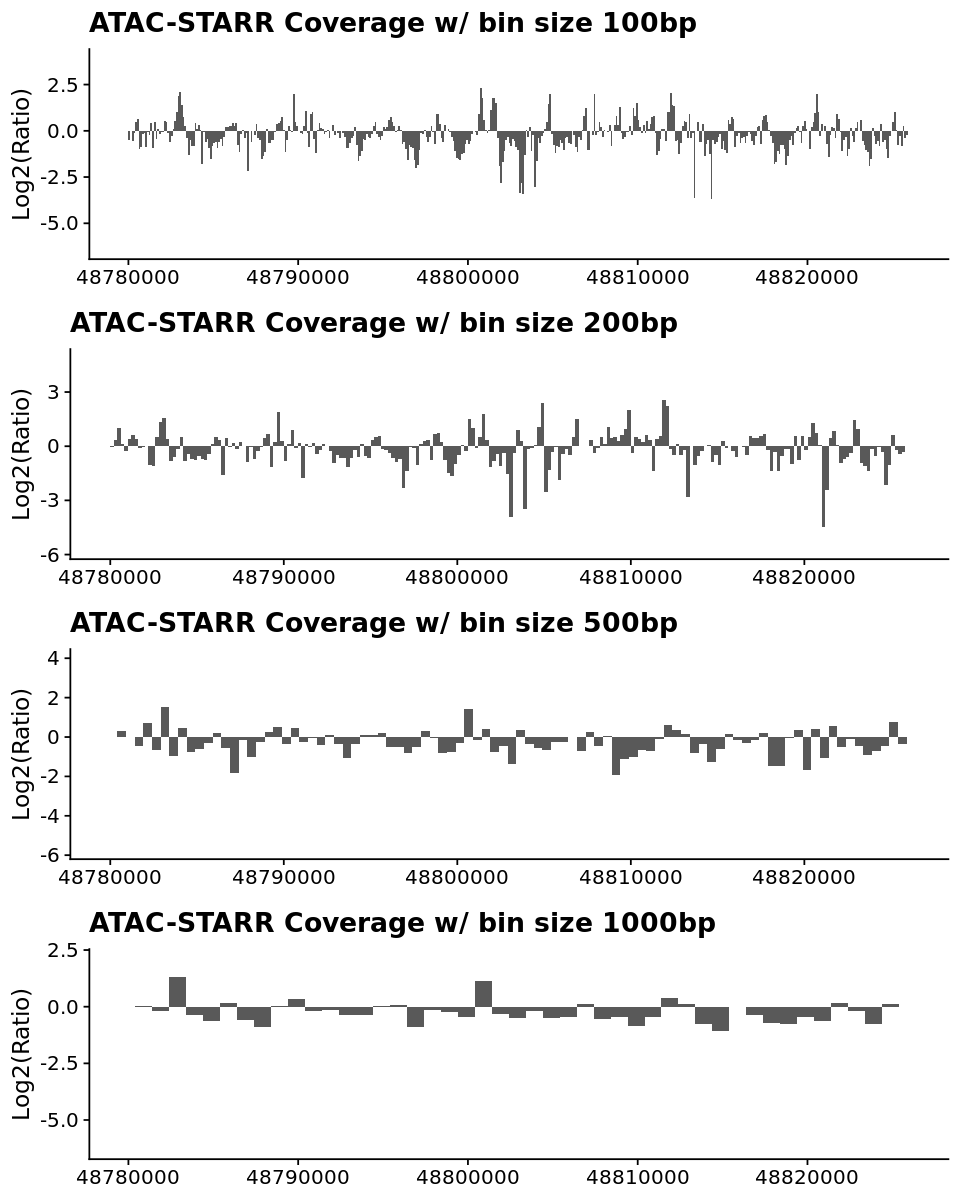

In [38]:
options(repr.plot.height=10, repr.plot.width=8)
plot_grid(plotlist = lst_gpt, ncol=1)

In [85]:
SIZES = c("100", "200", "500", "1000")
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

lst_dat = lapply(SIZES, function(size){
    fname = paste0(
        "KS91_K562_hg38_ASTARRseq_Depth.GATA1.unstranded.",
        "bin", size, 
        ".tsv")
    fpath = file.path(fdiry, fname)
    dat = read_tsv(fpath, show_col_types = FALSE)
    dat = dat %>% dplyr::select(-Depth_Norm, -Size)
    
    ### 
    dat_size = dat %>% group_by(Sample) %>% summarize(Size = sum(Depth))
    
    ### summarize the repeats for output and inptu
    dat = left_join(dat, dat_size, by="Sample")
    return(dat)
})

In [86]:
dat = lst_dat[[1]]

In [87]:
head(dat)

Chrom,Start,End,Sample,Group,Replicate,Depth,Size
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chrX,47787201,47787301,Input_rep1,Input,rep1,1,575673
chrX,47787601,47787701,Input_rep1,Input,rep1,3,575673
chrX,47787701,47787801,Input_rep1,Input,rep1,1,575673
chrX,47787801,47787901,Input_rep1,Input,rep1,1,575673
chrX,47787901,47788001,Input_rep1,Input,rep1,1,575673
chrX,47788001,47788101,Input_rep1,Input,rep1,3,575673


In [83]:
dat_size = dat %>% group_by(Sample) %>% summarize(Size = sum(Depth))
dat_size

Sample,Size
<chr>,<dbl>
Input_rep1,575673
Input_rep2,760090
Input_rep3,834573
Input_rep4,776694
Input_rep5,749991
Input_rep6,681208
Output_rep1,792887
Output_rep2,1021378
Output_rep3,662850


In [53]:
SIZES = c("100", "200", "500", "1000")
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

lst_dat = lapply(SIZES, function(size){
    fname = paste0(
        "KS91_K562_hg38_ASTARRseq_Depth.GATA1.unstranded.",
        "bin", size, 
        ".tsv")
    fpath = file.path(fdiry, fname)
    dat = read_tsv(fpath, show_col_types = FALSE)

    ###
    dat_size = dat %>% group_by(Sample) %>% summarize(Size = sum(Depth))
    
    ### summarize the repeats for output and inptu
    dat = left_join(dat, dat_size, by="Sample")
    dat = dat %>% 
        group_by(Chrom, Start, End, Group) %>% 
        summarise(Depth = mean(Depth, na.rm = TRUE), .groups = "drop")

    ### calculate the ratio
    dat = dat %>% 
        spread(Group, Depth) %>%
        mutate(Ratio = Output / Input)
    return(dat)
})

names(lst_dat) = SIZES

In [74]:
start  = 48780000
end    = 48826000

lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]] %>% dplyr::select(Chrom, Start, End, Output) %>% na.omit
    txt = paste0("ATAC-STARR Coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start, 
                xmax=End, 
                ymin=0, 
                ymax=log2(Output))) +
        labs(y="Output", title=txt) +
        xlim(start, end) +
        theme_cowplot()
    return(gpt)
})

Warning message:
“Removed 15537 rows containing missing values (geom_rect).”
Warning message:
“Removed 7535 rows containing missing values (geom_rect).”
Warning message:
“Removed 3202 rows containing missing values (geom_rect).”
Warning message:
“Removed 1632 rows containing missing values (geom_rect).”


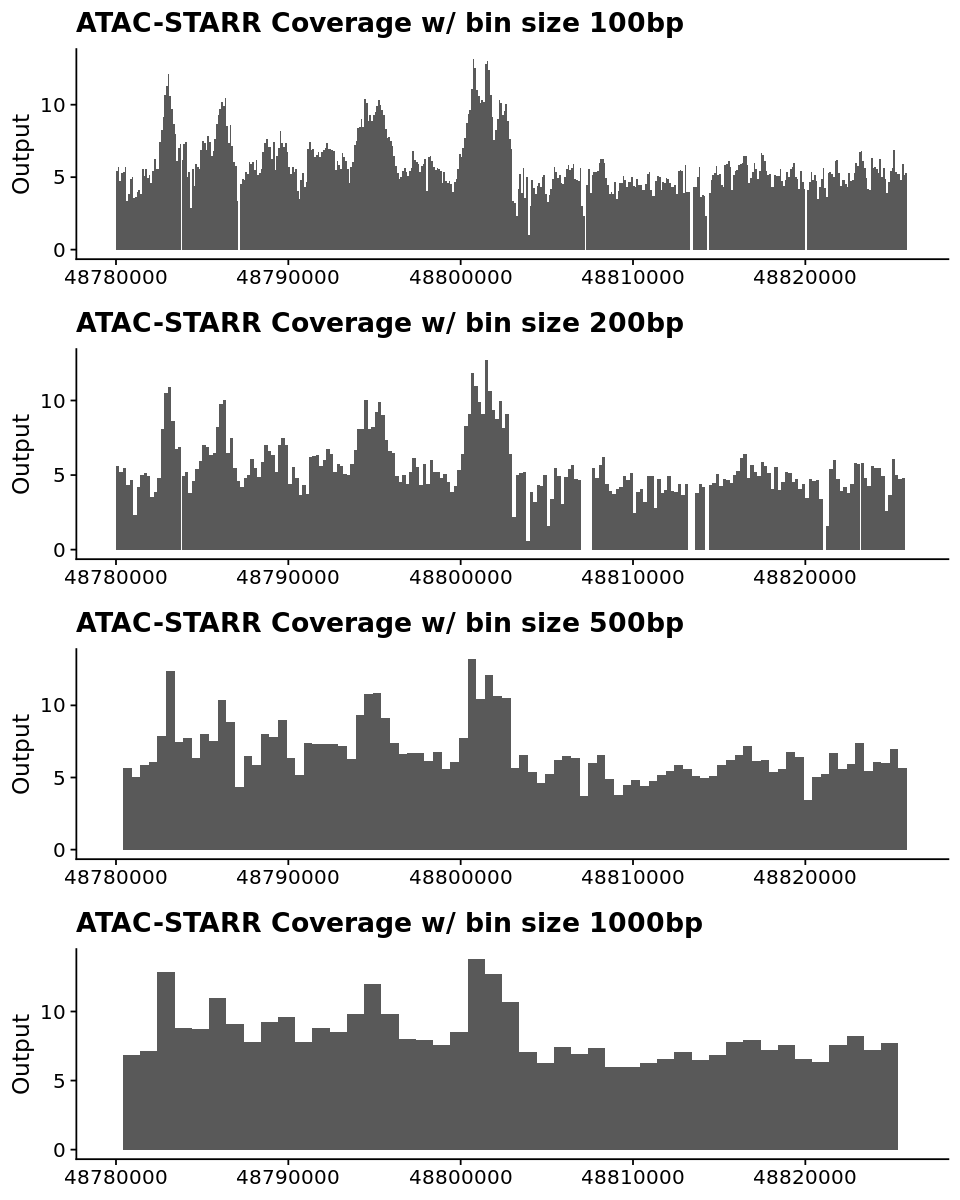

In [75]:
options(repr.plot.height=10, repr.plot.width=8)
plot_grid(plotlist = lst_gpt, ncol=1)

In [16]:
head(lst_dat[[1]])

Chrom,Start,End,Input,Output,Ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786501,47786601,2.166486e-06,NA,NA
chrX,47786601,47786701,2.166486e-06,NA,NA
chrX,47786701,47786801,2.166486e-06,NA,NA
chrX,47786801,47786901,4.332972e-06,NA,NA
chrX,47786901,47787001,2.166486e-06,NA,NA
chrX,47787001,47787101,2.158870e-06,NA,NA


In [6]:
dat = lst_dat[[1]]
### summarize the repeats for output and inptu
dat = dat %>% 
    group_by(Chrom, Start, End, Group) %>% 
    summarise(Depth_Norm = mean(Depth_Norm, na.rm = TRUE), .groups = "drop")

### calculate the ratio
dat = dat %>% 
    spread(Group, Depth_Norm) %>%
    mutate(Ratio = Output / Input)
head(dat)

Chrom,Start,End,Input,Output,Ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786501,47786601,2.166486e-06,NA,NA
chrX,47786601,47786701,2.166486e-06,NA,NA
chrX,47786701,47786801,2.166486e-06,NA,NA
chrX,47786801,47786901,4.332972e-06,NA,NA
chrX,47786901,47787001,2.166486e-06,NA,NA
chrX,47787001,47787101,2.158870e-06,NA,NA


In [8]:
tmp = dat %>% dplyr::select(Chrom, Start, End, Input) %>% na.omit
head(tmp)

Chrom,Start,End,Input
<chr>,<dbl>,<dbl>,<dbl>
chrX,47786501,47786601,2.166486e-06
chrX,47786601,47786701,2.166486e-06
chrX,47786701,47786801,2.166486e-06
chrX,47786801,47786901,4.332972e-06
chrX,47786901,47787001,2.166486e-06
chrX,47787001,47787101,2.158870e-06


In [11]:
size = 100
txt = paste0("ATAC-STARR Coverage w/ bin size ", size, "bp")
gpt = ggplot() +
    geom_rect(
        data = tmp,
        mapping=aes(
            xmin=Start, 
            xmax=End, 
            ymin=0, 
            ymax=Input)) +
    labs(y="Input", title=txt) +
    theme_cowplot()

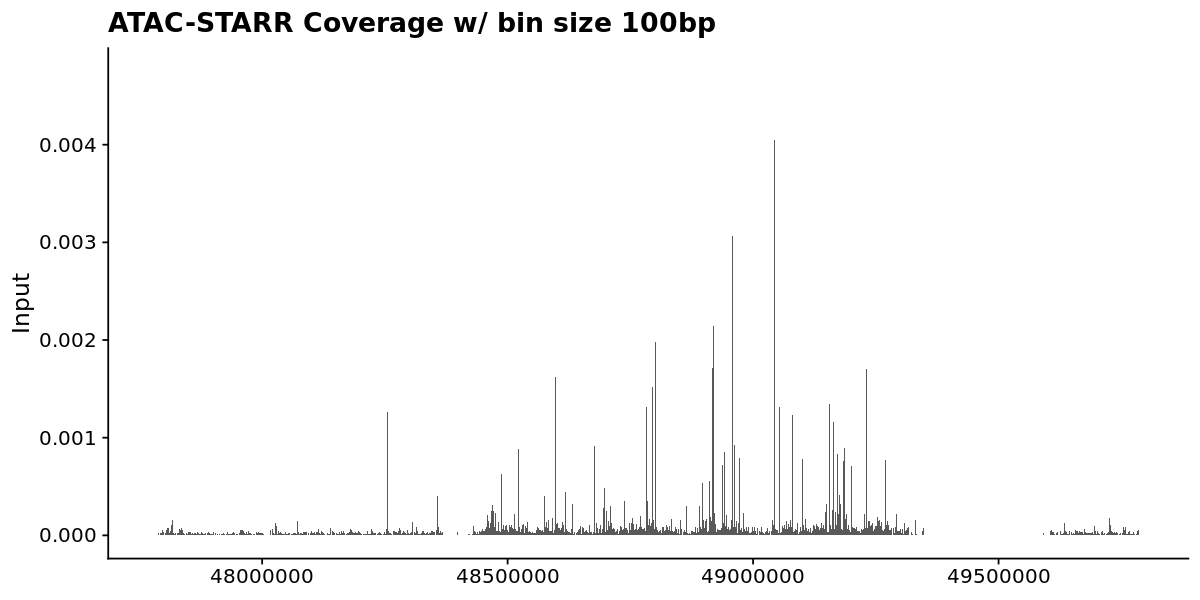

In [12]:
options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

In [4]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
sam   = paste("Input", "rep1", sep="_")
fglob = paste0("*", sam, "*")

Sys.glob(file.path(fdiry, fglob))

[1] "/mount/work/out/proj_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"

In [5]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment")
fname = "library_size.tsv"
dat_lib = read_tsv(file.path(fdiry, fname))
head(dat_lib)

Rows: 10 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Sample, Group, Replicate
dbl (1): Size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample,Group,Replicate,Size
<chr>,<chr>,<chr>,<dbl>
Input_rep1,Input,rep1,358823
Input_rep2,Input,rep2,461577
Input_rep3,Input,rep3,496229
Input_rep4,Input,rep4,464845
Input_rep5,Input,rep5,454013
Input_rep6,Input,rep6,409058


In [6]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### init:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### INPUT: set sample group and number of replicates
GROUP   = "Input"
REPLICS = paste0("rep", 1:6)

### INPUT: import data
lst_dat_inp = lapply(REPLICS, function(replic){
    ### get sample file path
    sam   = paste(GROUP, replic, sep="_")
    fglob = paste0("*", sam, "*")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    return(dat)
})

### OUTPUT: set sample group and number of replicates
GROUP   = "Output"
REPLICS = paste0("rep", 1:4)

### OUTPUT: import data
lst_dat_out = lapply(REPLICS, function(replic){
    ### get sample file path
    sam   = paste(GROUP, replic, sep="_")
    fglob = paste0("*", sam, "*")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    return(dat)
})

In [8]:
dat_astarr = bind_rows(lst_dat_inp, lst_dat_out) %>% 
    left_join(dat_lib, by="Sample") %>%
    mutate(Depth_Norm = Depth / Size)
head(dat_astarr)

Chrom,Loc,Depth,Sample,Group,Replicate,Size,Depth_Norm
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chrX,47786400,0,Input_rep1,Input,rep1,358823,0
chrX,47786401,0,Input_rep1,Input,rep1,358823,0
chrX,47786402,0,Input_rep1,Input,rep1,358823,0
chrX,47786403,0,Input_rep1,Input,rep1,358823,0
chrX,47786404,0,Input_rep1,Input,rep1,358823,0
chrX,47786405,0,Input_rep1,Input,rep1,358823,0


In [11]:
dat    = dat_astarr
n_rows = nrow(dat)
n_pick = 100

idx = rep(1:n_pick, n_rows / n_pick + 1)
idx = idx[1:n_rows]
idx = (idx == 1)

dat = dat[idx,]
head(dat)

Chrom,Loc,Depth,Sample,Group,Replicate,Size,Depth_Norm
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chrX,47786400,0,Input_rep1,Input,rep1,358823,0
chrX,47786500,0,Input_rep1,Input,rep1,358823,0
chrX,47786600,0,Input_rep1,Input,rep1,358823,0
chrX,47786700,0,Input_rep1,Input,rep1,358823,0
chrX,47786800,0,Input_rep1,Input,rep1,358823,0
chrX,47786900,0,Input_rep1,Input,rep1,358823,0


In [12]:
gpt = ggplot(dat, aes(x=Loc, y=Depth, color=Sample, group=Sample)) + 
    geom_line(size=0.05) + 
    geom_point(size=0.1) + 
    theme_cowplot()

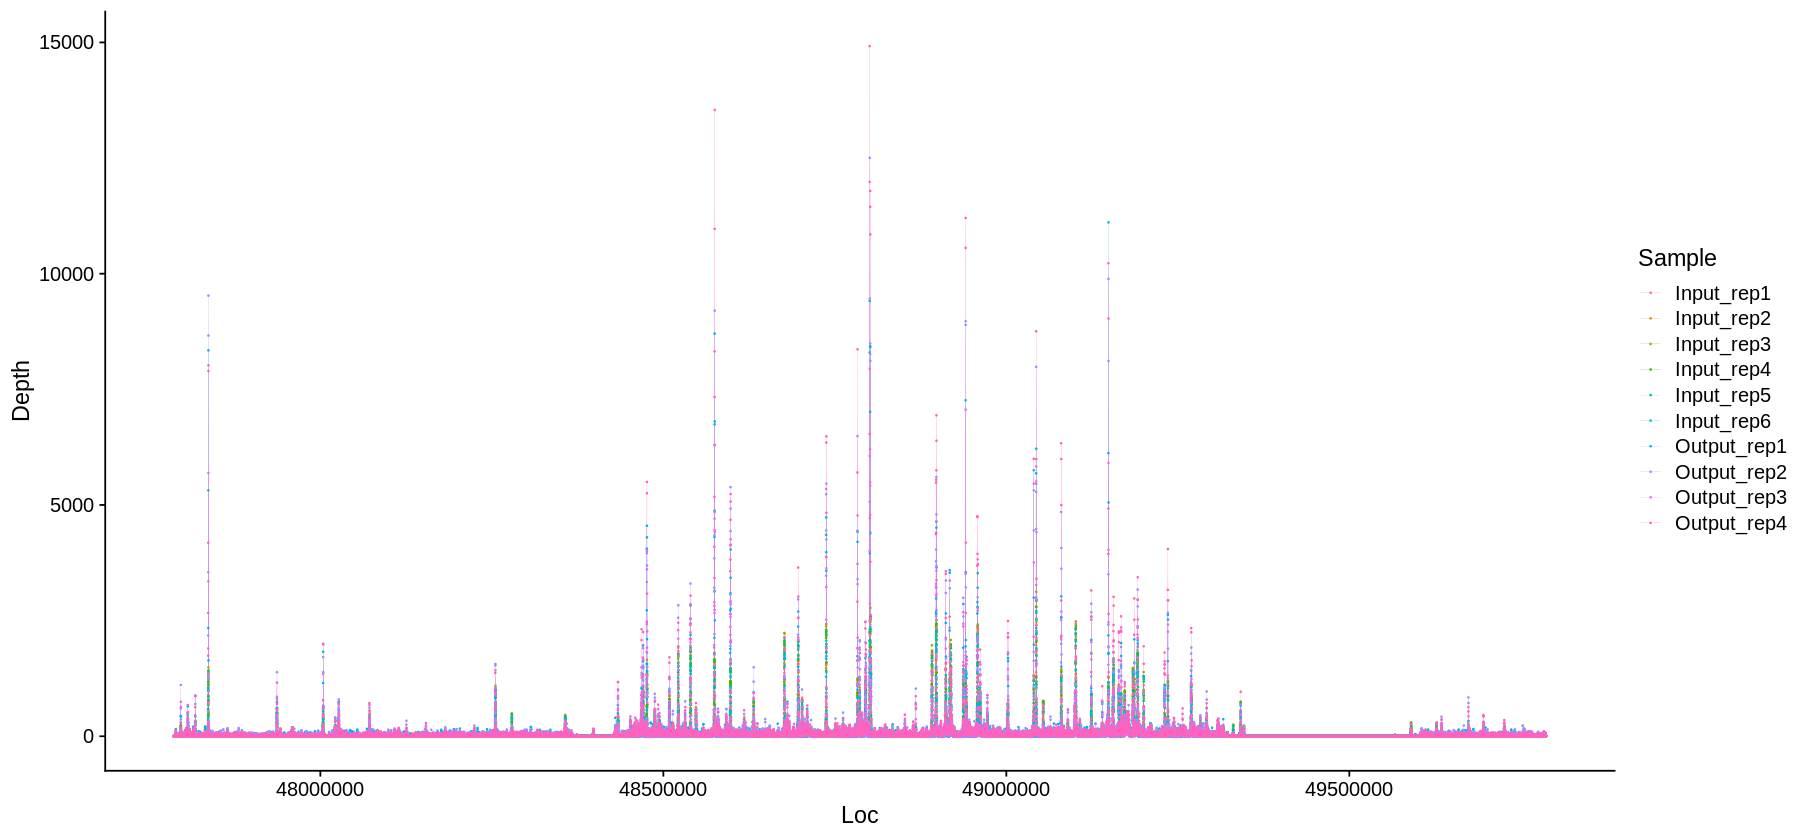

In [13]:
options(repr.plot.width=15, repr.plot.heigth=4)
print(gpt)

In [8]:
fdiry  = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname  = "KS91_K562_hg38_ASTARRseq_Output_rep4.GATA1.unstranded.perbase.tsv.gz"
fpath  = file.path(fdiry, fname)

ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")
dat    = read_tsv(fpath, col_types = ctypes, col_names = cnames)
head(dat)

Chrom,Loc,Depth
<chr>,<dbl>,<dbl>
chrX,47786400,0
chrX,47786401,0
chrX,47786402,0
chrX,47786403,0
chrX,47786404,0
chrX,47786405,0


In [9]:
gpt = ggplot(dat, aes(x=Loc, y=Depth)) + geom_point() + theme_cowplot()

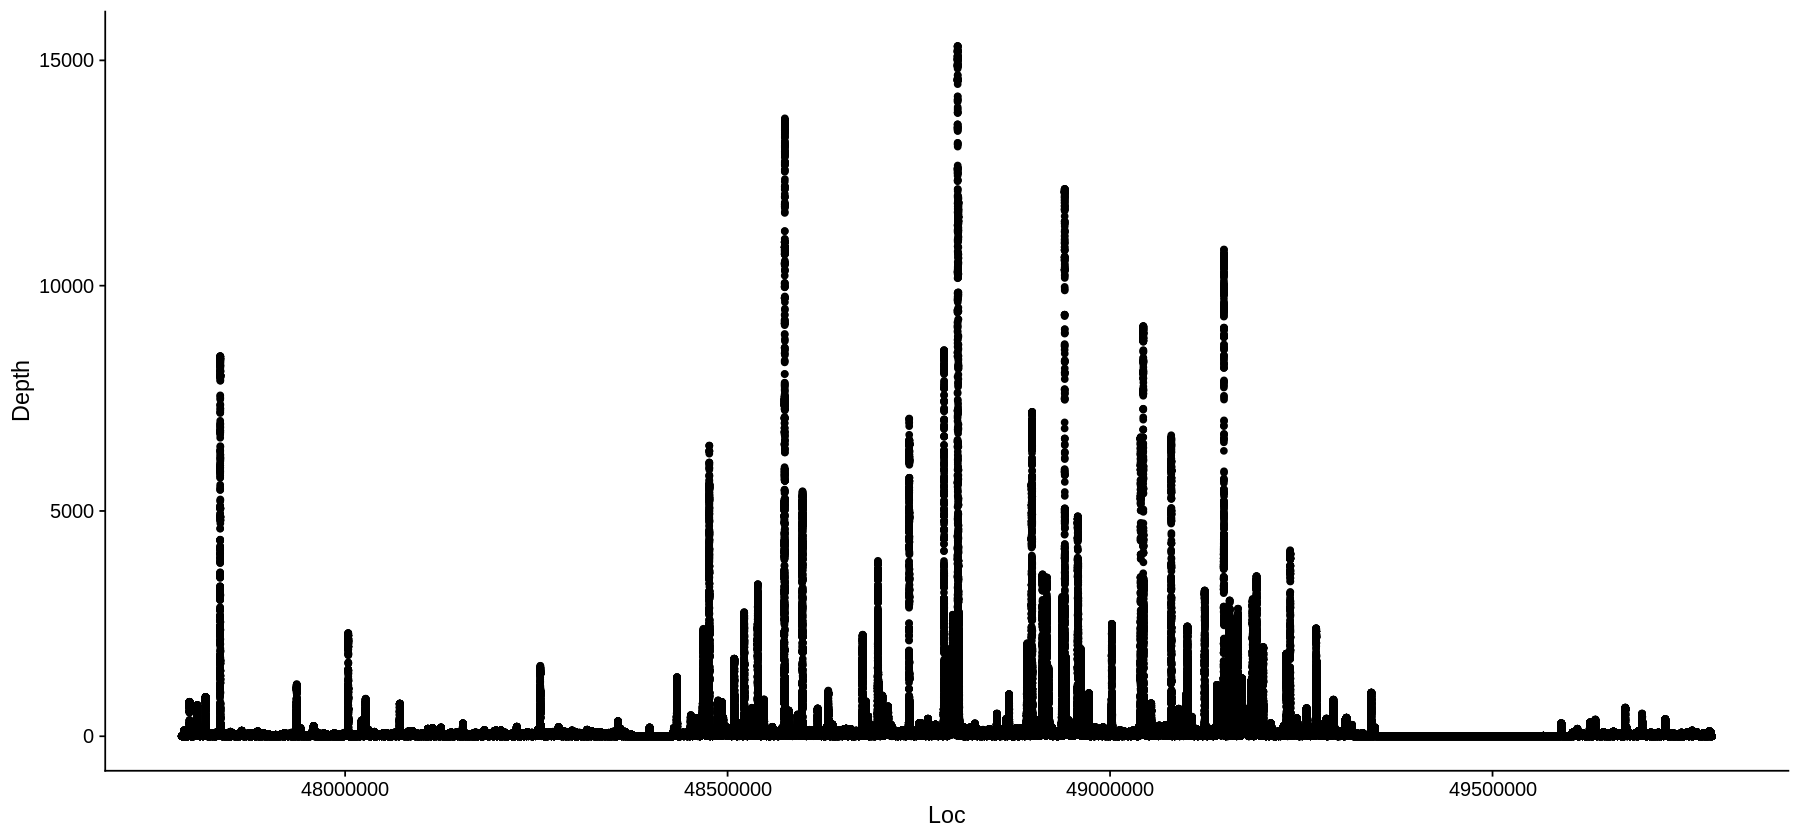

In [13]:
options(repr.plot.width=15, repr.plot.heigth=4)
print(gpt)

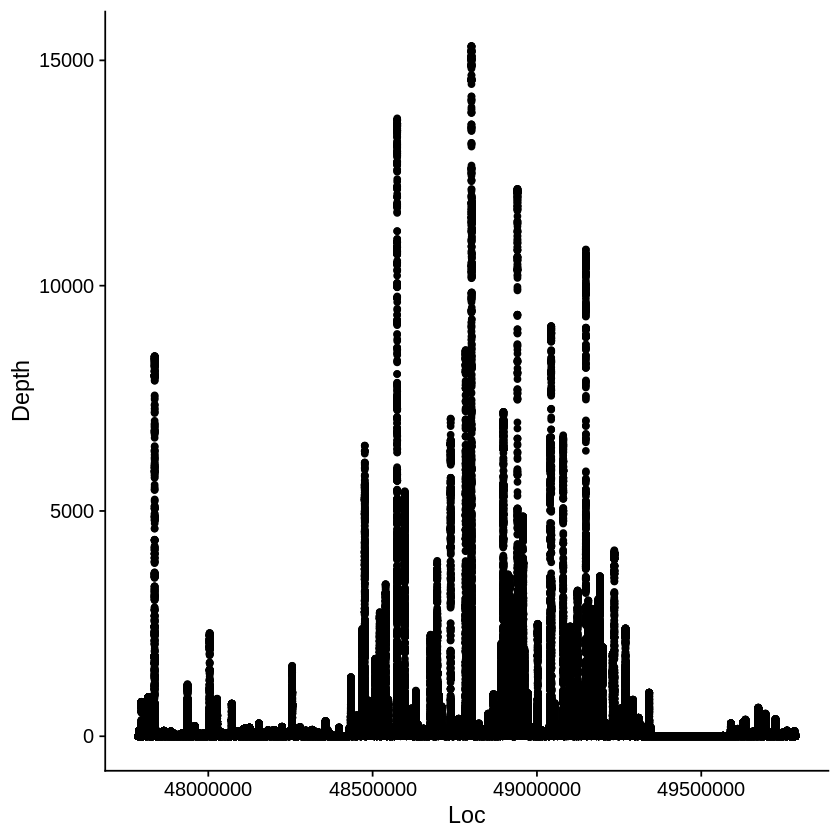

In [10]:
print(gpt)